In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
dados = pd.read_json('df_clean.json')
dados.columns

Index(['id_cliente', 'cancelamento', 'genero', 'idade_maior_65anos',
       'tem_parceirx', 'tem_dependentes', 'meses_de_contrato',
       'tem_assinatura_telefone', 'tem_linhas_telefone',
       'assinatura_provedor_internet', 'assinatura_seguranca_online',
       'assinatura_backup', 'assinatura_protecao_dispositivo',
       'assinatutra_suporte_tecnico', 'assinatura_tv_cabo',
       'assinatura_streaming', 'tipo_contrato', 'preferencia_fatura_online',
       'forma_pagamento', 'total_mensal', 'total_gasto', 'gasto_diario'],
      dtype='object')

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

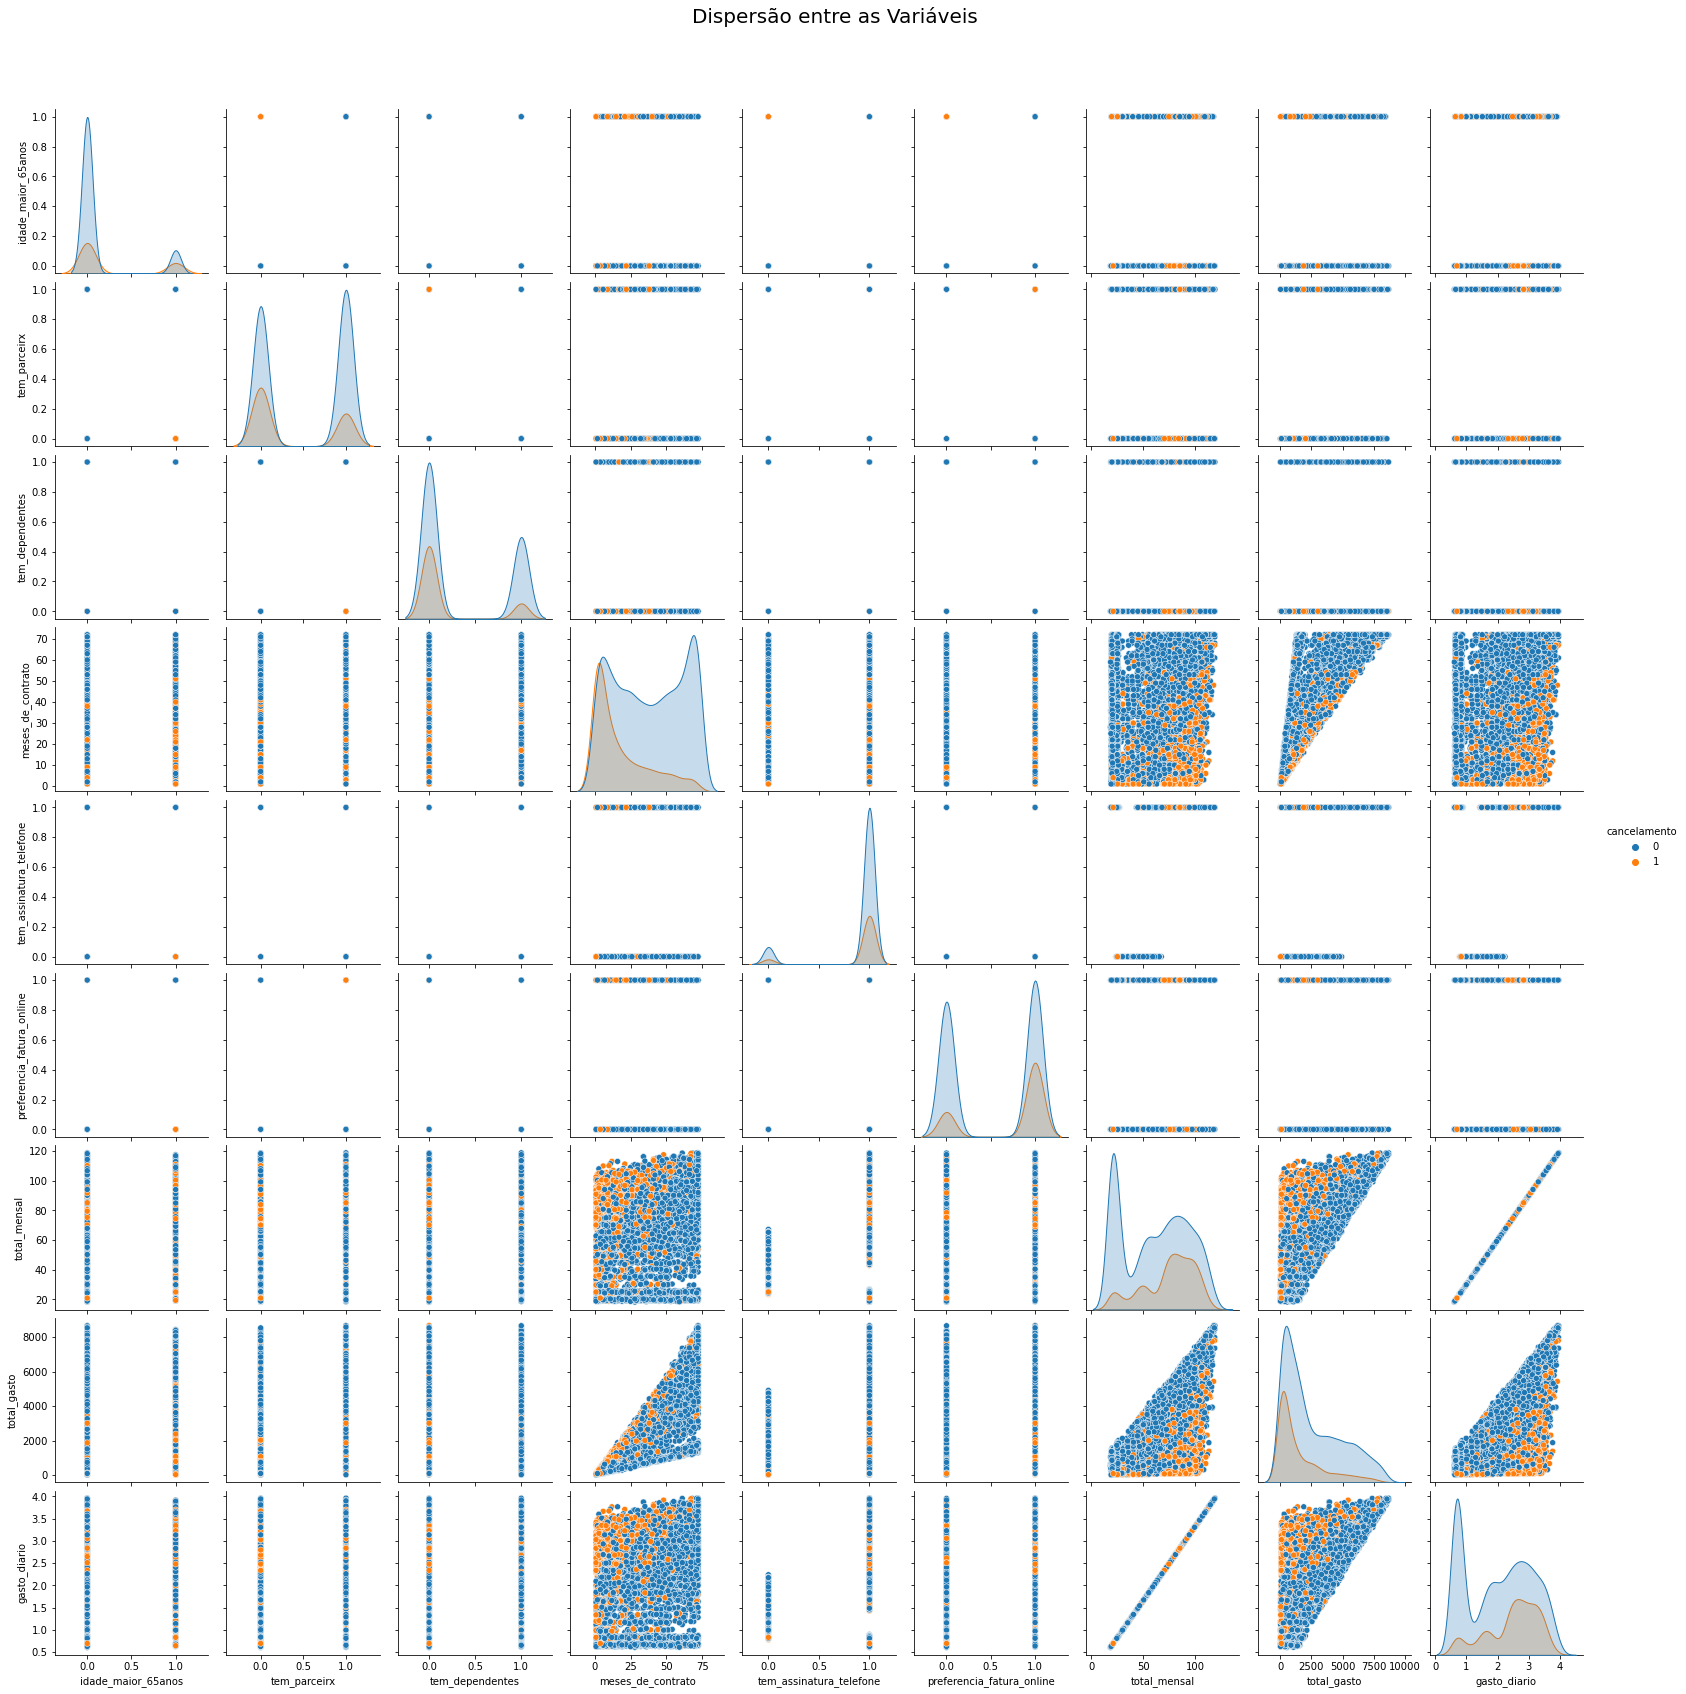

In [96]:
# Vendo a distribuição das variáveis

ax = sns.pairplot(data= dados, hue = 'cancelamento')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

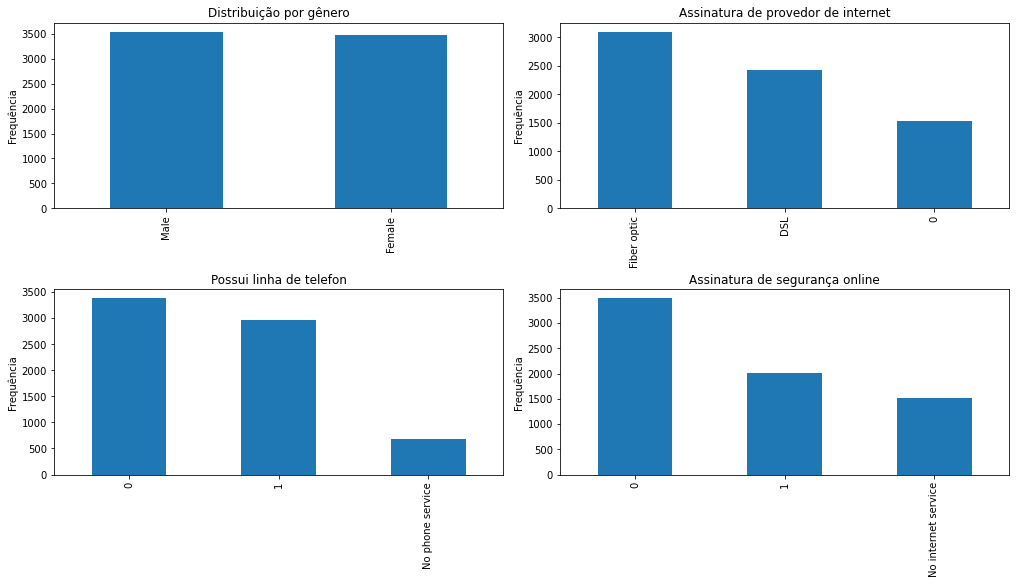

In [97]:
from matplotlib.gridspec import GridSpec

def plotar_grafico_barra(df, coluna, titulo, ax):
    ax = df[coluna].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title=titulo,
                                    ax=ax)
    ax.set_ylabel("Frequência")

fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

plotar_grafico_barra(dados, 'genero', "Distribuição por gênero", ax1)
plotar_grafico_barra(dados, 'tem_linhas_telefone', "Possui linha de telefone", ax2)
plotar_grafico_barra(dados, 'assinatura_provedor_internet', "Assinatura de provedor de internet", ax3)
plotar_grafico_barra(dados, 'assinatura_seguranca_online', "Assinatura de segurança online", ax4)

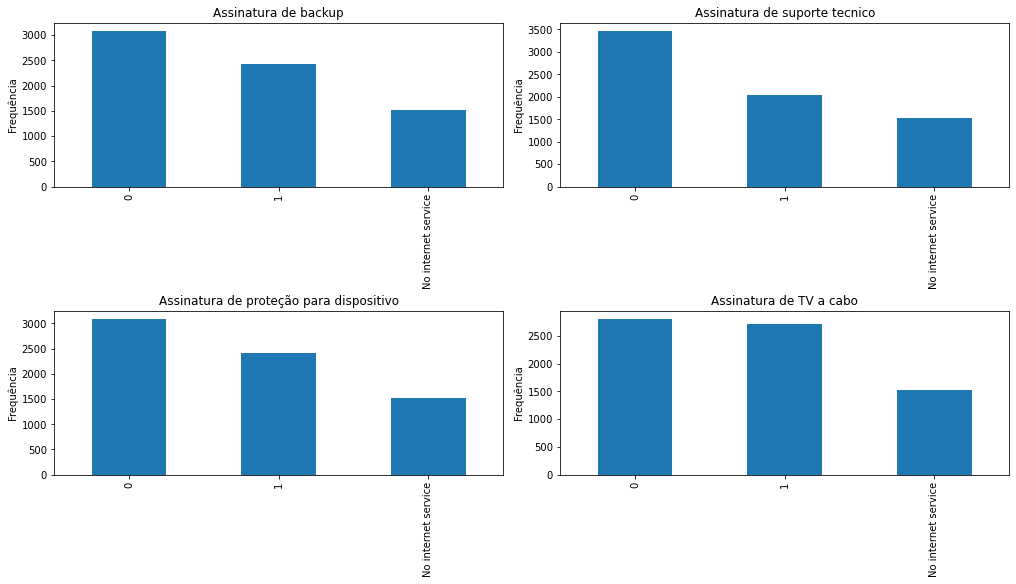

In [98]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])

plotar_grafico_barra(dados, 'assinatura_backup', "Assinatura de backup", ax1)
plotar_grafico_barra(dados, 'assinatura_protecao_dispositivo', "Assinatura de proteção para dispositivo", ax2)
plotar_grafico_barra(dados, 'assinatutra_suporte_tecnico', "Assinatura de suporte tecnico", ax3)
plotar_grafico_barra(dados, 'assinatura_tv_cabo', "Assinatura de TV a cabo", ax4)

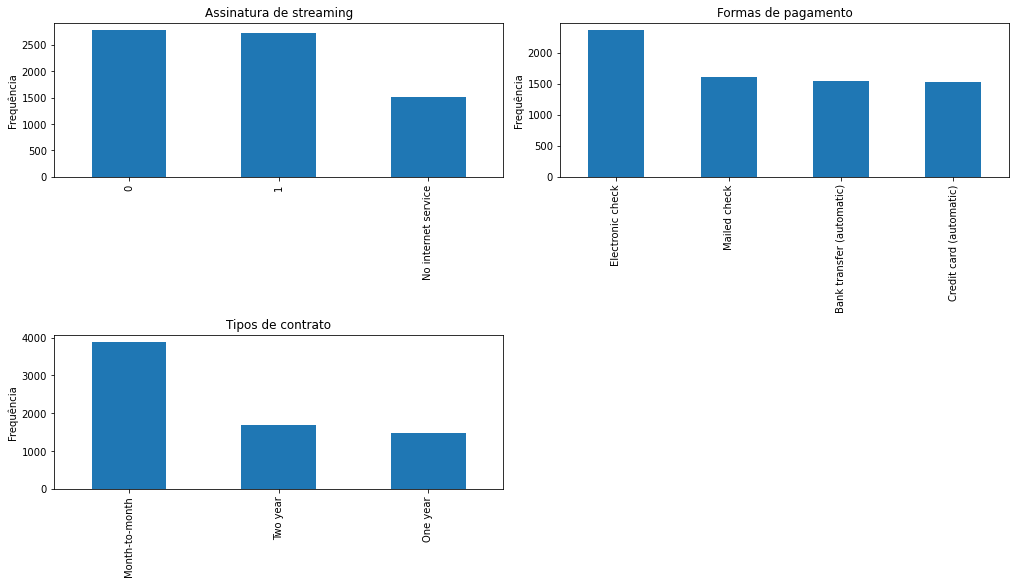

In [99]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])

plotar_grafico_barra(dados, 'assinatura_streaming', "Assinatura de streaming", ax1)
plotar_grafico_barra(dados, 'tipo_contrato', "Tipos de contrato", ax2)
plotar_grafico_barra(dados, 'forma_pagamento', "Formas de pagamento", ax3)

In [118]:
# Transformando dados que não sao boleanos em boleanos, para realziar as correlações entre as variáveis

dados_v2 = dados.replace('No internet service', 0)
dados_boleanos = dados_v2.replace('No phone service', 0)

# Conferindo transformações
print(dados_boleanos['assinatura_seguranca_online'].value_counts())
print(dados_boleanos['tem_linhas_telefone'].value_counts())
print(dados_boleanos['assinatura_backup'].value_counts())
print(dados_boleanos['assinatura_protecao_dispositivo'].value_counts())
print(dados_boleanos['assinatutra_suporte_tecnico'].value_counts())
print(dados_boleanos['assinatura_tv_cabo'].value_counts())

# Salvando a nova base
dados_boleanos.to_json('df_boleano.json')

0    5017
1    2015
Name: assinatura_seguranca_online, dtype: int64
0    4065
1    2967
Name: tem_linhas_telefone, dtype: int64
0    4607
1    2425
Name: assinatura_backup, dtype: int64
0    4614
1    2418
Name: assinatura_protecao_dispositivo, dtype: int64
0    4992
1    2040
Name: assinatutra_suporte_tecnico, dtype: int64
0    4329
1    2703
Name: assinatura_tv_cabo, dtype: int64


<AxesSubplot:>

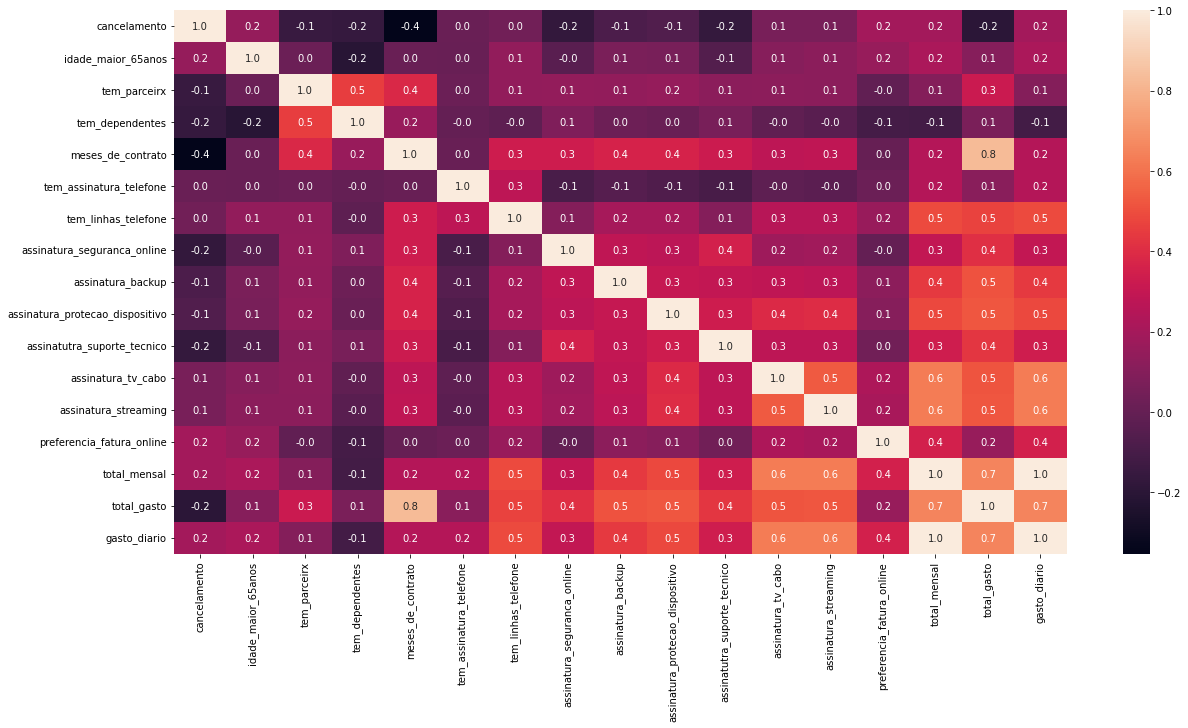

In [105]:
# Vendo a correlação entre as variáveis descritivas com a variável target

matriz_correl = dados_boleanos.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(matriz_correl, annot = True, fmt = ".1f")

In [106]:
# Avaliando variáveis que apresentam correlação entre sí (fora a variável target)

matriz_correl_superior = matriz_correl[matriz_correl>=0.6]
matriz_correl_inferior = matriz_correl[matriz_correl<=(-0.2)]

In [114]:
somatorio_matriz_superior = matriz_correl_superior.sum()
somatorio_matriz_superior[somatorio_matriz_superior>1]

meses_de_contrato       1.825880
assinatura_tv_cabo      2.259336
assinatura_streaming    2.254469
total_mensal            3.907967
total_gasto             3.128010
gasto_diario            3.907967
dtype: float64

In [117]:
somatorio_matriz_inferior = matriz_correl_inferior.sum()
somatorio_matriz_inferior[somatorio_matriz_inferior<0]

cancelamento         -0.354049
idade_maior_65anos   -0.210550
tem_dependentes      -0.210550
meses_de_contrato    -0.354049
dtype: float64